# Linear Regression Project


## Problem statement

An Ecommerce company based in New York City sells clothing online, but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, kstest

In [3]:
#setting the color pallete
palette = sns.color_palette("Purples_r")
sns.set_palette(palette)
sns.set_style('whitegrid')

In [4]:
# load the dataset to pandas Data Frame
# Reading the csv file in df variable and printing out first 10 rows using head method
Customers = pd.read_csv("C:\\Users\\Hp\\Desktop\\Refactor_Projects\\Ecommerce Customers.csv",delimiter=",")
Customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# Printing out last 10 rows using tail method
Customers.tail(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


### Observation of Dataset

Shape : Find out the total number of rows and columns in the dataset using “.shape”

In [6]:
#Dataset comprises 500 observations(rows) and 8 features(columns).
#Out of the 8, one is the target variable and rest 7 are input variables.

Customers.shape

(500, 8)

In [7]:
#Data_Types of Each COlumns
Customers.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

The describe() function in pandas is very handy in getting various summary statistics. 
This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [8]:
Customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
"""Customers.info returns information about the data frame including the data types of each column, 
number of null values in each column and memory usage of the entire data."""

Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Observation :
    
The data has only float and Object values.
There are no missing values

Variables and features both are the same, they are often used interchangeably. All the column names in a dataset are variables.

In [10]:
for i in Customers.columns:
    print(i)

Email
Address
Avatar
Avg. Session Length
Time on App
Time on Website
Length of Membership
Yearly Amount Spent


In [11]:
print(len(Customers.columns))

8


3. Renaming Columns 

rename() is used to rename the columns

parameters .rename(columns = {'old_name':'new_name'},inplace= True)

inplace =True makes change in the dataframe itself.

In [12]:
Customers.rename(columns={'Avg. Session Length':'Average_Session_Length', 'Time on App':'Time_on_App', 'Time on Website':'Time_on_Website', 'Length of Membership':'Length_of_Membership'})

,Email,Address,Avatar,Average_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### Checking for Missing Values  & Checking for Duplicates

Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.

Pandas provides isnull(), isna() functions to detect missing values. Both of them do the same thing.

In [13]:
Customers.isna().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [14]:
Customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Observation: There is no missing value in any column

Duplicates can be checked using the duplicated() method.

In [15]:
duplicate = Customers[Customers.duplicated()]
duplicate.shape

(0, 8)

In [16]:
x=Customers.iloc[:,3:-1]
y=Customers.iloc[:,-1]

# EDA (Exploratory Data Analysis)

The pair plot builds on two basic figures: The histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

It plots every numerical attribute against every other.

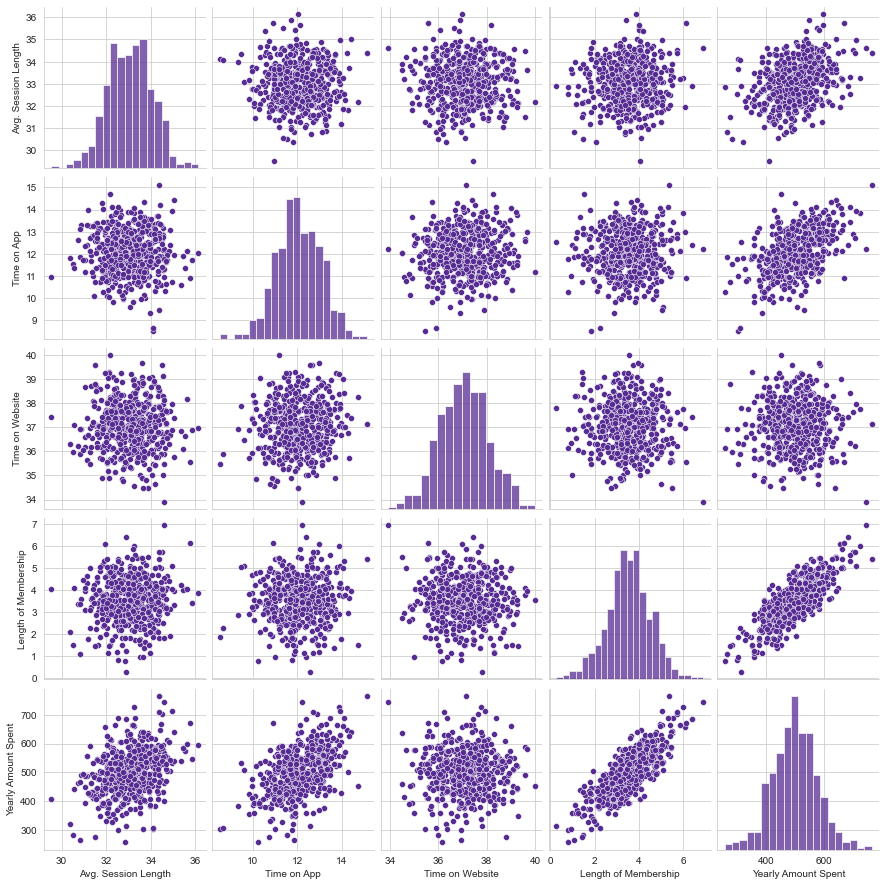

In [17]:
sns.pairplot(Customers)

Correlation:

Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.

We can check how each feature is related to others using corr() function.

In [18]:
Customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

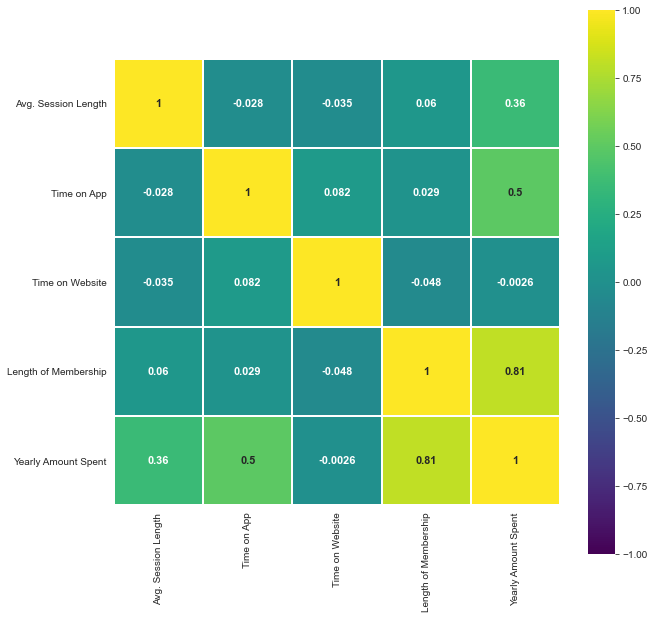

In [19]:
# Correlation Heatmap to fine out highly correlated columns
plt.figure(figsize=(10,10))
sns.heatmap(Customers.corr(),cmap="viridis",vmin=-1,vmax=1,annot=True,annot_kws={'fontsize':11,'fontweight':'bold'},square=True,linewidth=0.1)

Text(0, 0.5, 'Yearly Amount Spent')

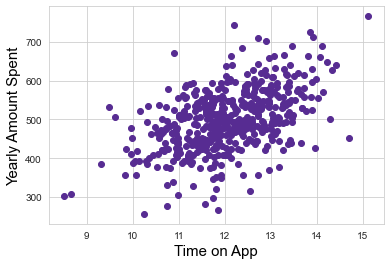

In [20]:
plt.scatter(x="Time on App",y="Yearly Amount Spent",data=Customers)
plt.xlabel("Time on App",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

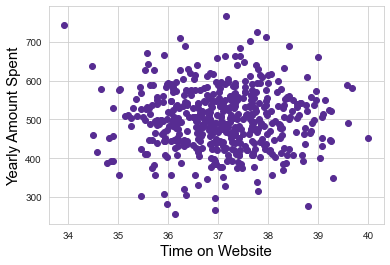

In [21]:
plt.scatter(x="Time on Website",y="Yearly Amount Spent",data=Customers)
plt.xlabel("Time on Website",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

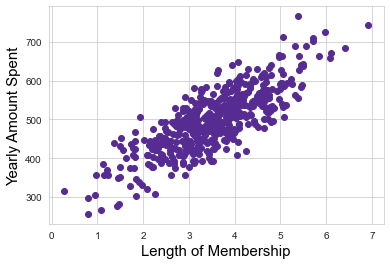

In [22]:
plt.scatter(x="Length of Membership",y="Yearly Amount Spent",data=Customers)
plt.xlabel("Length of Membership",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

In [23]:
#checking the correaltion between these 2 variables as their scatterplot shows a somewhat linear trend

Customers["Length of Membership"].corr(Customers['Yearly Amount Spent']) 

0.8090835682475813

(0.0, 790.9608559212762)

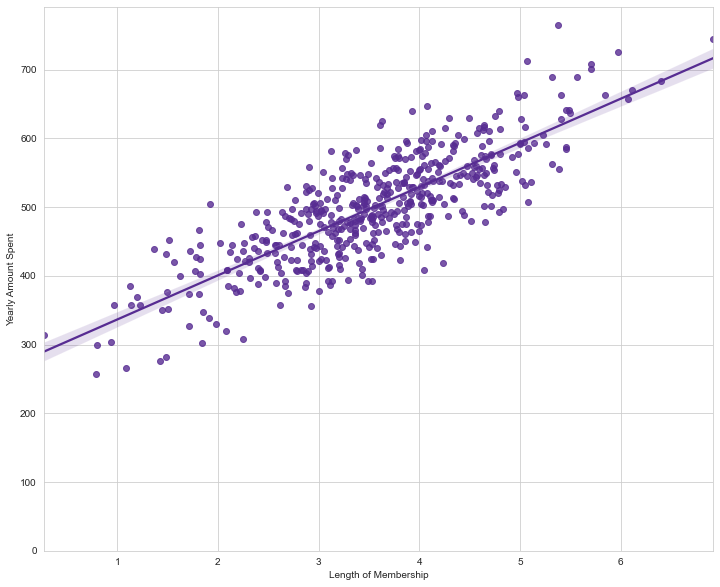

In [24]:
#Generating a regplot to see how the the best fitted linear regression line going through the data.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='Length of Membership',y='Yearly Amount Spent', data=Customers)
plt.ylim(0,)

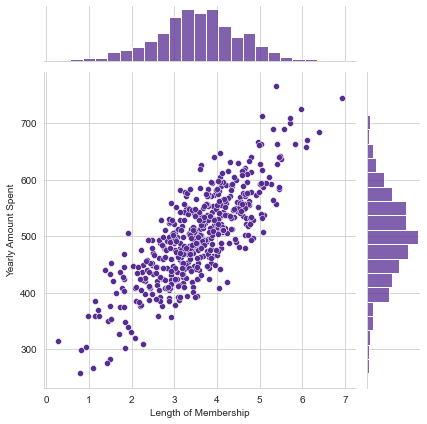

In [25]:
# A jointplot to better understand the data
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=Customers)

Linearity checking for other variables

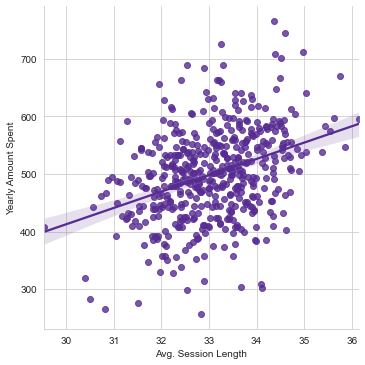

In [26]:
sns.lmplot(x="Avg. Session Length",y="Yearly Amount Spent",data=Customers)

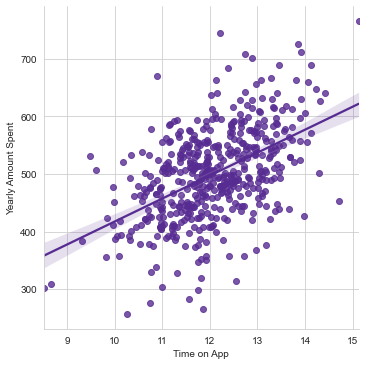

In [27]:
sns.lmplot(x="Time on App",y="Yearly Amount Spent",data=Customers)

There is more linear relationship between input feature Length of Membership and Yearly Amount spend

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

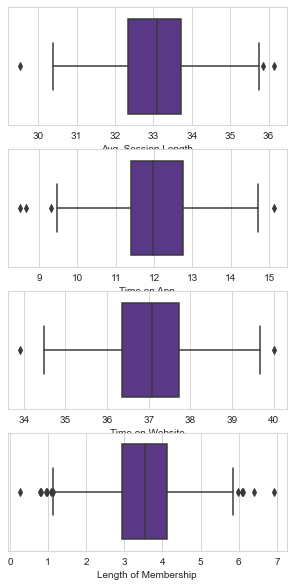

In [28]:
fig,axes=plt.subplots(4,figsize=(5,10))
plt1=sns.boxplot(Customers["Avg. Session Length"],ax=axes[0])
plt2=sns.boxplot(Customers["Time on App"],ax=axes[1])
plt3=sns.boxplot(Customers["Time on Website"],ax=axes[2])
plt4=sns.boxplot(Customers["Length of Membership"],ax=axes[3])

In [29]:
data1=Customers.iloc[:,3:]

In [30]:
def outlier_removal(data1,col):
    plt.figure(figsize=(20,20))
    fig,axes=plt.subplots(ncols=1,nrows=2,figsize=(12,4))
    sns.boxplot(data=data1,x=col,ax=axes[0]).set_title("Before Outlier removal"+col)
    lower_limit=data1[col].quantile(0.10)
    upper_limit=data1[col].quantile(0.90)
    a=[]
    for x in data1[col]:
        if x<lower_limit:
            x=lower_limit
            a.append(x)
        elif x>upper_limit:
            x=upper_limit
            a.append(x)
        else:
            x=x
            a.append(x)
    data1[col]=a
    sns.boxplot(data=data1,x=col,ax=axes[1],color='yellow').set_title("After Outlier Removal"+col)
    plt.show()
    return Customers

<Figure size 1440x1440 with 0 Axes>

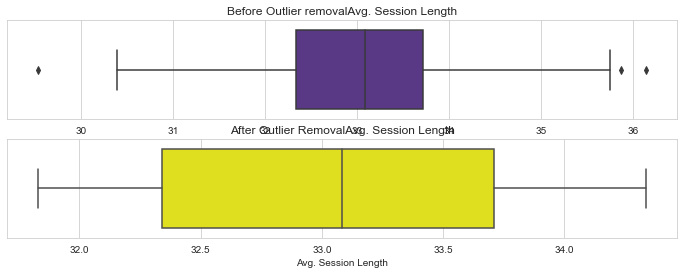

<Figure size 1440x1440 with 0 Axes>

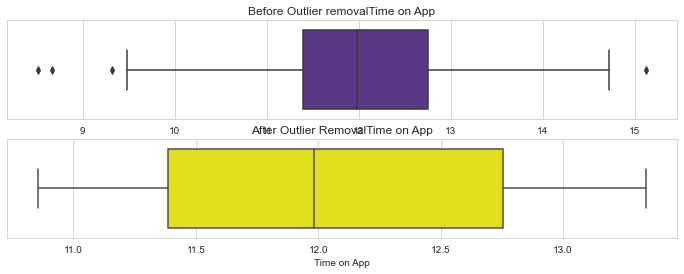

<Figure size 1440x1440 with 0 Axes>

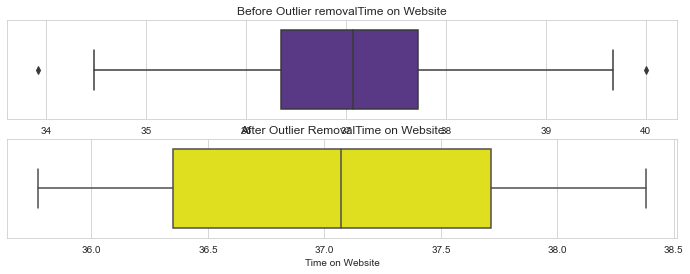

<Figure size 1440x1440 with 0 Axes>

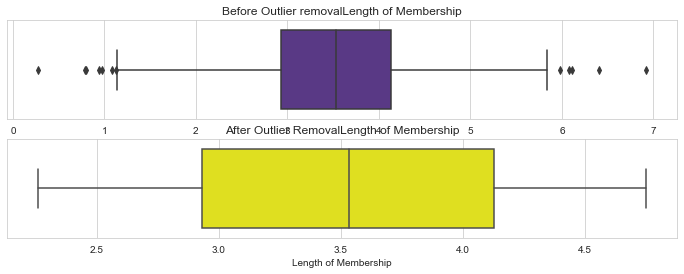

<Figure size 1440x1440 with 0 Axes>

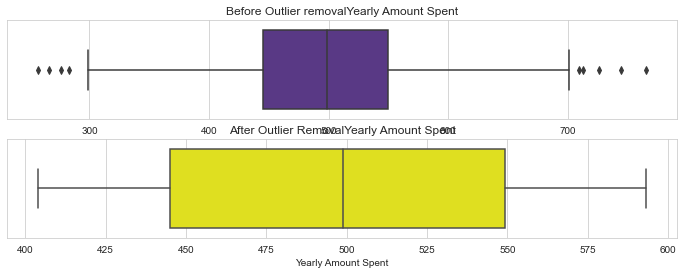

In [31]:
for col in data1.columns:
    Customers=outlier_removal(data1,col)
plt.show()

Target Variable & Input Variable
Target Variable:

The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.

The target variables are : 'Yearly Amount Spent'

Input Variable :

One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.

In our example, the input variables are:  'Time on App', 'Length of Membership'.

All of these will help us predict the Yearly Amount Spent.

In [32]:
Customers['Yearly Amount Spent'].unique()

array([587.95105397, 392.20493344, 487.54750487, 581.85234404,
       599.40609205, 637.10244792, 521.57217476, 549.90414611,
       570.20040896, 427.1993849 , 492.60601272, 522.33740461,
       408.64035107, 573.41586733, 470.4527333 , 461.7807422 ,
       457.84769594, 407.70454755, 452.31567548, 605.0610388 ,
       534.70574381, 419.93877484, 436.51560573, 519.34098913,
       700.91709162, 423.17999168, 619.89563986, 486.83893477,
       529.53766534, 554.72208383, 497.5866713 , 447.68790654,
       588.71260551, 491.07322368, 507.44183234, 521.88357317,
       347.77692663, 490.73863214, 478.17033405, 537.84619527,
       532.75178758, 501.87443028, 591.19717818, 547.24434342,
       448.22982919, 549.86059046, 593.91500297, 563.67287336,
       479.73194909, 416.35835358, 725.58481406, 442.66725174,
       384.62657157, 451.45744687, 522.40414126, 483.67330802,
       520.89879445, 453.16950235, 496.65070807, 547.36514059,
       616.85152297, 507.212569  , 613.59932337, 483.15

In [33]:
Customers['Yearly Amount Spent'].nunique()

500

In [34]:
Customers['Yearly Amount Spent'].value_counts()

531.961551    1
548.280320    1
392.285244    1
401.033135    1
418.150081    1
             ..
378.473566    1
499.140152    1
554.722084    1
463.745981    1
393.857371    1
Name: Yearly Amount Spent, Length: 500, dtype: int64

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

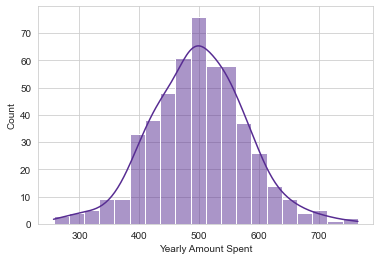

In [35]:
sns.histplot(x="Yearly Amount Spent",data=Customers,kde=True)

Target variable has symmetrical distribution.

# Train & Test Split

In [36]:
#X = Customers['Length of Membership']

In [37]:
X = Customers[['Length of Membership']]  #input variables 
Y= Customers[['Yearly Amount Spent']]  #Target variables 

In [38]:
#printing the input variable
print(X)

     Length of Membership
0                4.082621
1                2.664034
2                4.104543
3                3.120179
4                4.446308
..                    ...
495              3.746573
496              3.576526
497              4.958264
498              2.336485
499              2.735160

[500 rows x 1 columns]


In [39]:
#printing the target variable
print(Y)

     Yearly Amount Spent
0             587.951054
1             392.204933
2             487.547505
3             581.852344
4             599.406092
..                   ...
495           573.847438
496           529.049004
497           551.620145
498           456.469510
499           497.778642

[500 rows x 1 columns]


In [40]:
# Performing a train_test_Split
# test_size --> to specify the percentage of test data needed..
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

In [41]:
#Printing a number of rows and columns in the dataset after train test split
print(Y.shape, Y_train.shape, Y_test.shape)

(500, 1) (400, 1) (100, 1)


In [42]:
#Printing the mean of Target varibale of test_train data
print(Y.mean(), Y_train.mean(), Y_test.mean())

Yearly Amount Spent    499.314038
dtype: float64 Yearly Amount Spent    500.481302
dtype: float64 Yearly Amount Spent    494.644983
dtype: float64


In [43]:
#Printing the mean of input varibale of test_train data
print(X_train.mean(), X_test.mean(), X.mean())

Length of Membership    3.532461
dtype: float64 Length of Membership    3.537463
dtype: float64 Length of Membership    3.533462
dtype: float64


In [44]:
#Input varibale --> training data
print(X_train)

     Length of Membership
238              2.267251
438              3.535088
475              4.301996
58               3.471919
380              3.228718
..                    ...
255              2.907095
72               3.401522
396              6.115199
235              3.634094
37               3.452389

[400 rows x 1 columns]


# Linear Regression Model

In [45]:
#Creating an instance of linear regression model and then fitting it to the data
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

In [46]:
#Predicting using Linear regression model
y_pred = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent')

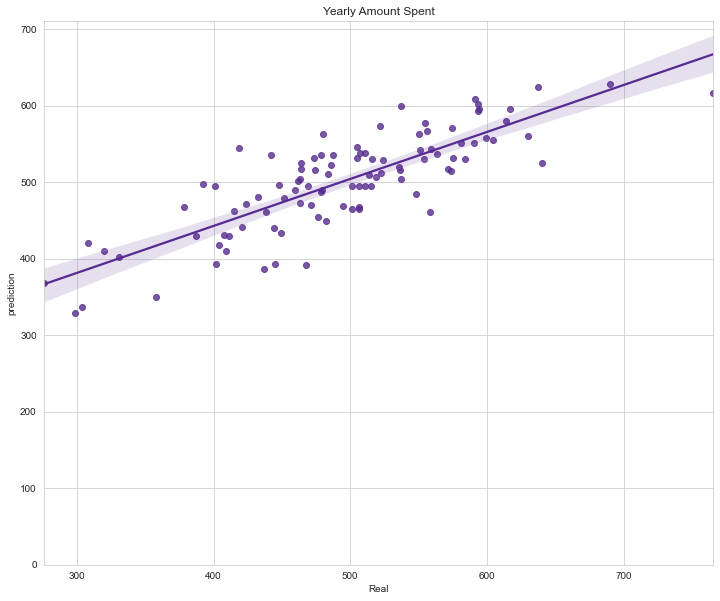

In [47]:
#generating a regplot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x=Y_test, y=y_pred, data=Customers)
plt.ylim(0,)
plt.xlabel("Real")
plt.ylabel("prediction")
plt.title("Yearly Amount Spent")

# Results and Performance Metrics

In [48]:
from sklearn.metrics import r2_score
#Checking the R squraed error on test data
r2_score(Y_test,y_pred)

0.6653081175728375

In [49]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))))

MAE: 38.882994900419824
MSE: 2446.5019197682896
RMSE: 49.46212611451604


Higher the R2 score the better and lower the MSE the better.

In [50]:
#finding the y-intercept
print("Intercept : ",lm.intercept_)

Intercept :  [278.26103868]


In [51]:
#print Length of Membership Coef1
coef1=lm.coef_
print(coef1)

[[62.9080551]]


Single Linear Regression model: y = mx1 + c
where, m = coefficients

x 1= independent variables used in the model.

and c = y-intercept

so yearly amount spent= 62.9080551*Length of Membership - 278.26103868]

### We had left out a variable which had lesser degree of positive correlation.Let’s add that variable ('Time on App','Avg. Session Length') and see if it improves our model.

In [52]:
x = Customers[['Time on App', 'Length of Membership','Avg. Session Length']]

In [53]:
#Splitting the dataset as done before.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [54]:
# creating an instance of multiple regresssion model and then fitting it ot the data
mul=LinearRegression()
mul.fit(x_train,y_train)

LinearRegression()

In [55]:
#fit the model
mul.fit(x_train, y_train)

LinearRegression()

In [56]:
#predicting using the linear regression model
Y_pred=mul.predict(x_test)

In [57]:
#Let’s check out the m and c values.
print("Coeffs are Time on App : {0} , Length of Membership: {1} , Avg. Session Length: {2}".format(mul.coef_[0], mul.coef_[1], mul.coef_[2]))
print("Intercept : ",mul.intercept_)

Coeffs are Time on App : 38.947931303332645 , Length of Membership: 61.40522962563368 , Avg. Session Length: 25.72629087983685
Intercept :  -1037.41038747215


### Multiple Linear regression model

The above Multiple Linear regression model equation came up to be :

y=mx1+m2x2+m3x3+c

y = 38.87721532021003*(Time on App) + 61.479622322396324*(Length of Membership) + 25.785979870437252*(Avg. Session Length) - 1038.4093543832662

Text(0.5, 1.0, 'Yearly Amount Spent')

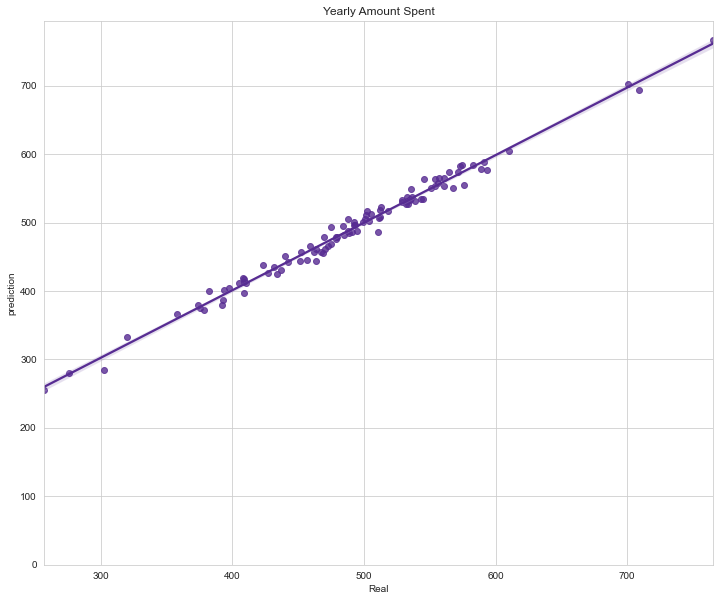

In [58]:
#generating a regplot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x=y_test, y=Y_pred, data=Customers)
plt.ylim(0,)
plt.xlabel("Real")
plt.ylabel("prediction")
plt.title("Yearly Amount Spent")

Text(0, 0.5, 'Predicted values')

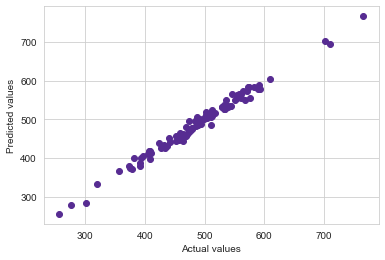

In [59]:
#we have fit the model , Let’s see the graph between predicted values and actual values.
result = mul.predict(x_test)
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [60]:
print('R2 score : ',metrics.r2_score(y_test, result))
print('MSE ', metrics.mean_squared_error(y_test,result))


R2 score :  0.9878571990624215
MSE  81.2181489987404


Here, R2 score is higher and MSE is lower.

That is a significant improvement of R2 score (0.66 -> 0.98)and MSE (2446.50 -> 81.21) with the addition of a new variable.

So, Addition of the column 'Time on App','Avg. Session Length' has greatly improved the model for us even though it had little positive correlation with the dependent variable.

In [61]:
# Storing the independent features error on test data
P_X = x

from sklearn.preprocessing import PolynomialFeatures
#Changing the data to 1 3rd degree polynomial
pol = PolynomialFeatures(degree = 3)
P_X=pol.fit_transform(x)
P_X

array([[1.00000000e+00, 1.26556511e+01, 4.08262063e+00, ...,
        5.74993257e+02, 4.85856955e+03, 4.10538695e+04],
       [1.00000000e+00, 1.11094607e+01, 2.66403418e+00, ...,
        2.26583247e+02, 2.71541500e+03, 3.25420291e+04],
       [1.00000000e+00, 1.13302781e+01, 4.10454320e+00, ...,
        5.55975483e+02, 4.47009536e+03, 3.59399886e+04],
       ...,
       [1.00000000e+00, 1.14994091e+01, 4.95826447e+00, ...,
        8.02600979e+02, 5.28457791e+03, 3.47953272e+04],
       [1.00000000e+00, 1.23914230e+01, 2.33648467e+00, ...,
        1.81912885e+02, 2.59440705e+03, 3.70009412e+04],
       [1.00000000e+00, 1.24188083e+01, 2.73515957e+00, ...,
        2.52232553e+02, 3.10924015e+03, 3.83272269e+04]])

In [62]:
Customers.shape

(500, 8)

In [63]:
print(P_X.shape)

(500, 20)


In [64]:
# Trainig the model similarly but with 3rd degree polynomail of x this time
X_train, X_test, Y_train, Y_test = train_test_split(P_X,Y,random_state = 1,test_size=0.15)
reg = LinearRegression().fit(X_train,Y_train)
y_pred1 = reg.predict(X_test)
r2_score(Y_test,y_pred1)

0.9868090531122705

In [65]:
# a cross validating the score to check and avoid overfitting
from sklearn.model_selection import cross_val_score
#c = cross_val_score(mul, x, y,cv=4)
c = cross_val_score(mul, P_X, y,cv=4)
c

array([0.98052359, 0.98390189, 0.9849527 , 0.97808054])

In [66]:
#Final Mean Accuracy
print("Mean accuracy after cross validation is :",c.mean()*100 , end = "%")

Mean accuracy after cross validation is : 98.18646792528509%

# lasso Regression

In [67]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

lasso=Lasso()

In [68]:
parameters={'alpha':np.arange(0.01, 2, 0.01)}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=12)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=12, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])},
             scoring='neg_mean_squared_error')

In [69]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 0.01}
-105.37756622260201


In [70]:
lasso_pred=lassocv.predict(x_test)

In [71]:
score=r2_score(lasso_pred,y_test)
score
     

0.9876762214914143

# Ridge Regression

In [72]:
ridge_regressor=Ridge()

In [73]:
parameters={'alpha':np.arange(0.01, 3, 0.01)}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=12)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=12, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])},
             scoring='neg_mean_squared_error')

In [74]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 0.01}
-105.37647367251276


In [75]:
ridge_pred=ridgecv.predict(x_test)
score=r2_score(ridge_pred,y_test)
score
     

0.9876799151337526

## Conclusion

The company should focus on mobile app and length of membership because the Length of the membership has a high positive correlation with the yearly amount spent.
The Time on app and the Average Session length has low positive correlation with the yearly amount spent. 
The Time on website has nearly zero correlation with the yearly amount spent.